In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_all = pd.read_csv('data/selected_projects.csv')

In [4]:
df_all.shape[0]

1454

In [5]:
df = pd.read_csv('data/pull_details.csv')

In [6]:
df.columns

Index(['repo_name', 'last_commit_sha', 'pull_number', 'count_review_requests',
       'count_all_reviews', 'count_all_review_comments', 'count_all_comments',
       'count_changed_files', 'count_total_changed_lines'],
      dtype='object')

In [13]:
df[2120:2130]

,repo_name,last_commit_sha,pull_number,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
2120,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3657,0,1,0,1,7,38
2121,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3656,0,1,0,1,28,376
2122,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3655,0,0,0,2,1,2
2123,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3654,0,0,0,0,1,2
2124,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3652,0,1,0,1,1,2
2125,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3651,0,3,0,0,2,4
2126,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3650,0,2,1,1,14,989
2127,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3649,2,20,31,3,12,27103
2128,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3648,0,3,0,0,1,9
2129,apache/iotdb,25fefb540b6ee9ceaafa515a4ef2b571ec3be08a,3647,0,3,2,1,46,734


In [6]:
df.groupby(df["repo_name"]).size().shape[0]

1432

In [7]:
missing_df = df[df.groupby(df["repo_name"])['last_commit_sha'].transform('size') < 20]

In [8]:
missing_df.groupby(missing_df["repo_name"]).size()

repo_name
apache/cassandra                                    8
apache/flink-statefun                              11
apache/poi                                          2
apache/zookeeper                                    2
bcgit/bc-java                                       9
drklo/telegram                                     19
facebook/litho                                      2
fossasia/open-event-organizer-android              19
fossasia/phimpme-android                           10
iiitv/algos                                        14
jensgerdes/sonar-pmd                               19
jetbrains/intellij-plugins                          1
jetbrains/intellij-sdk-docs                        12
julianhyde/sqlline                                 11
kunal-kushwaha/dsa-bootcamp-java                    5
liferay/liferay-portal                              1
material-components/material-components-android     1
nekox-dev/nekox                                    16
neo4j/neo4j       

In [9]:
missing_repos = missing_df.repo_name.unique()

In [10]:
no_pull_repos = df_all[~df_all.Name.isin(df.repo_name.unique())].Name.unique()
no_pull_repos

array(['androidx/androidx', 'facebook/fresco',
       'gravitee-io/gravitee-gateway', 'hacktoberfest17/programming',
       'mission-peace/interview', 'open-metadata/openmetadata',
       'openjdk/jdk', 'openjdk/jdk17', 'openjdk/jmc',
       'openjdk/panama-foreign', 'openjdk/skara', 'openjdk/valhalla',
       'ows-ali/hacktoberfest', 'rovo89/xposedinstaller',
       'signalapp/signal-android', 'spring-io/initializr',
       'spring-projects/spring-boot',
       'spring-projects/spring-data-commons',
       'spring-projects/spring-data-jdbc',
       'spring-projects/spring-data-redis',
       'thepranaygupta/data-structures-and-algorithms',
       'vijaygupta18/hacktoberfest-2021'], dtype=object)

In [11]:
df = df[~df.repo_name.isin(missing_repos)]
df.shape[0]

27960

In [12]:
df.groupby(df["repo_name"]).size().shape[0]

1398

In [13]:
df_combined = df.groupby(df["repo_name"]).sum()
df_combined = df_combined.drop(['pull_number'], axis=1)
df_combined.head() 

,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines
repo_name,,,,,,
1c-syntax/bsl-language-server,4,64,72,36,752,40997
abhpd/hacktoberfest2021,5,14,0,14,52,7629
actiontech/dble,2,17,0,1,58,1513
activiti/activiti,0,31,17,13,70,2696
adeekshith/watomatic,1,16,0,11,88,2392


In [14]:
df_combined.shape[0]

1398

In [15]:
df_combined["code_review_metric"] = df_combined["count_all_reviews"] + df_combined["count_all_comments"]

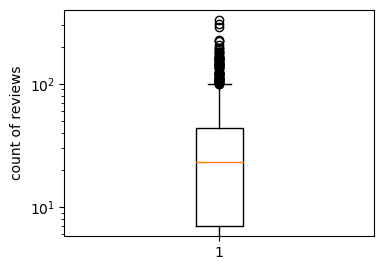

In [16]:
plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':100})
fig1, ax1 = plt.subplots()
ax1.set_ylabel('count of reviews')
ax1.boxplot(df_combined["count_all_reviews"])
ax1.set_yscale('log')
plt.show()

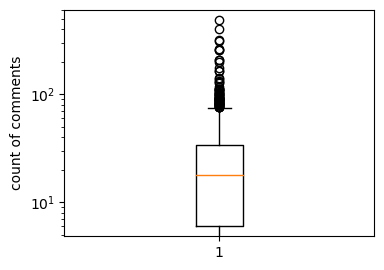

In [17]:
plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':100})
fig1, ax1 = plt.subplots()
ax1.set_ylabel('count of comments')
ax1.boxplot(df_combined["count_all_comments"])
ax1.set_yscale('log')
plt.show()

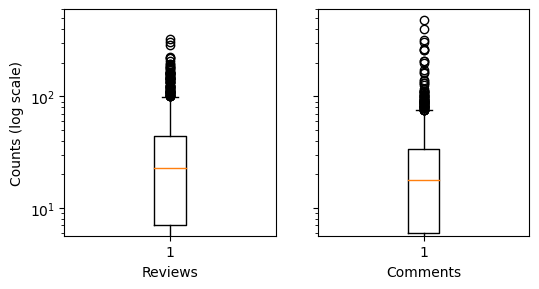

In [18]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':100})
fig1, ax1 = plt.subplots(1,2,sharey=True)
ax1[0].set_xlabel('Reviews')
ax1[0].set_ylabel('Counts (log scale)')
ax1[0].boxplot(df_combined["count_all_reviews"])
ax1[0].set_yscale('log')
# ax1[1].set_ylabel('Count of statuses per project')
ax1[1].set_xlabel('Comments')
ax1[1].boxplot(df_combined["count_all_comments"])
ax1[1].set_yscale('log')
plt.show()

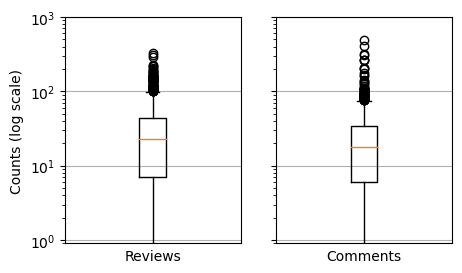

In [42]:

plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':100})
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 5}

# plt.rc('font', **font)
fig1, ax1 = plt.subplots(1,2,sharey=True)

ax1[0].set_xlabel('Reviews')
ax1[0].set_ylabel('Counts (log scale)')
ax1[0].boxplot(df_combined["count_all_reviews"])
ax1[0].set_yscale('log')
ax1[0].yaxis.grid(True)
ax1[0].set_xticks([0], ['Reviews'])


ax1[1].set_xlabel('Comments')
ax1[1].boxplot(df_combined["count_all_comments"])
ax1[1].set_yscale('log')
ax1[1].set_xticks([0], ['Comments'])


plt.grid(True)
plt.ylim(0.9, 1000)
plt.gcf().set_size_inches(5,3)
# plt.rc('axes', axisbelow=True)
# plt.show()
plt.savefig('code-review-box-chart.pdf', dpi=300)

In [20]:
print(np.percentile(df_combined["count_all_reviews"].tolist(), 70))
print(np.percentile(df_combined["count_all_reviews"].tolist(), 80))
print(np.percentile(df_combined["count_all_reviews"].tolist(), 90))

38.0
50.0
73.0


In [21]:
print(np.percentile(df_combined["count_all_comments"].tolist(), 70))
print(np.percentile(df_combined["count_all_comments"].tolist(), 80))
print(np.percentile(df_combined["count_all_comments"].tolist(), 90))

29.0
38.0
56.299999999999955


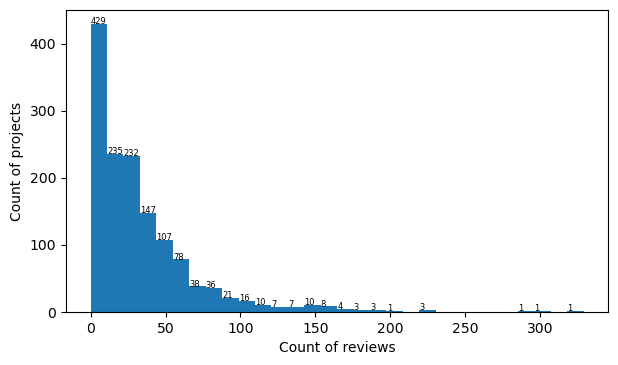

In [38]:
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':100})
counts, bins, _ = plt.hist(df_combined["count_all_reviews"], bins=30)

SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

for n, b in zip(counts, bins):
    if n > 0:
        plt.gca().text(b + 0.1, n, str(int(n)))  # +0.1 to center text

plt.gca().set(title='', ylabel='Count of projects', xlabel='Count of reviews')
# plt.show()
plt.savefig('code-review-reviews-bar-chart.pdf', dpi=300)

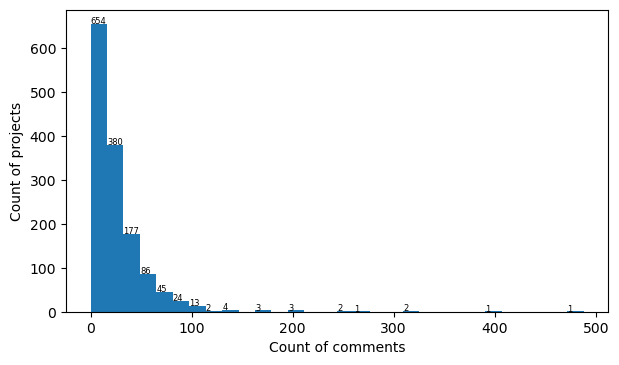

In [37]:
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':100})
counts, bins, _ = plt.hist(df_combined["count_all_comments"], bins=30)

SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

for n, b in zip(counts, bins):
    if n > 0:
        plt.gca().text(b + 0.1, n, str(int(n)))  # +0.1 to center text

plt.gca().set(title='', ylabel='Count of projects', xlabel='Count of comments')
# plt.rc('axes', axisbelow=True)
# plt.grid(True)
# plt.show()

plt.savefig('code-review-comments-bar-chart.pdf', dpi=300)

In [24]:
df_combined[df_combined["count_review_requests"] > 0].shape[0]

775

In [25]:
df_combined[df_combined["code_review_metric"] < 20]

,count_review_requests,count_all_reviews,count_all_review_comments,count_all_comments,count_changed_files,count_total_changed_lines,code_review_metric
repo_name,,,,,,,
actiontech/dble,2,17,0,1,58,1513,18
adjust/android_sdk,0,3,0,10,472,26664,13
alex-the-666/ice_and_fire,0,0,6,11,2135,137190,11
alibaba/datax,0,0,0,5,133,10535,5
alphawallet/alpha-wallet-android,0,10,0,3,195,6953,13
...,...,...,...,...,...,...,...
xuxueli/xxl-job,0,0,0,3,29,417,3
yuliskov/smarttubenext,0,0,0,0,22,669,0
zebrunner/carina,0,0,0,1,50,9277,1


In [28]:
df_combined.loc[df_combined['count_all_reviews'] > 73, 'reviews_rate'] = "Very High"
df_combined.loc[df_combined['count_all_reviews'] <= 73, 'reviews_rate'] = "High"
df_combined.loc[df_combined['count_all_reviews'] <= 50, 'reviews_rate'] = "Moderate"
df_combined.loc[df_combined['count_all_reviews'] <= 38, 'reviews_rate'] = "Low"

df_combined.loc[df_combined['count_all_comments'] > 56.3, 'comments_rate'] = "Very High"
df_combined.loc[df_combined['count_all_comments'] <= 56.3, 'comments_rate'] = "High"
df_combined.loc[df_combined['count_all_comments'] <= 38, 'comments_rate'] = "Moderate"
df_combined.loc[df_combined['count_all_comments'] <= 29, 'comments_rate'] = "Low"

In [56]:
df_combined = df_combined.reset_index()

In [58]:
df_results = pd.read_csv('data/combined_results.csv')

for index, row in df_combined.iterrows():
    df_results.loc[df_results['repo_name'] == row['repo_name'], 'cr_reviews'] = row['count_all_reviews']
    df_results.loc[df_results['repo_name'] == row['repo_name'], 'cr_comments'] = row['count_all_comments']
    df_results.loc[df_results['repo_name'] == row['repo_name'], 'cr_review_comments'] = row['count_all_review_comments']
    df_results.loc[df_results['repo_name'] == row['repo_name'], 'cr_changed_files'] = row['count_changed_files']
    df_results.loc[df_results['repo_name'] == row['repo_name'], 'cr_changed_lines'] = row['count_total_changed_lines']

df_results.to_csv('data/combined_results.csv', index=False)

In [33]:
final_df = pd.read_csv('data/combined_results.csv')
final_df.head()

,repo_name,testing,sat_usage,ci_state
0,1c-syntax/bsl-language-server,NaN,0,0.0
1,abhpd/hacktoberfest2021,NaN,0,NaN
2,actiontech/dble,Very Low,1,1.0
3,activiti/activiti,NaN,1,1.0
4,adeekshith/watomatic,NaN,0,1.0


In [34]:
for index, row in df_combined.iterrows():
    final_df.loc[final_df['repo_name'] == row['repo_name'], 'reviews'] = row['reviews_rate']
    final_df.loc[final_df['repo_name'] == row['repo_name'], 'comments'] = row['comments_rate']

In [35]:
final_df.reviews.value_counts()

Low          979
Moderate     143
High         139
Very High    137
Name: reviews, dtype: int64

In [36]:
final_df.comments.value_counts()

Low          985
Very High    140
High         137
Moderate     136
Name: comments, dtype: int64

In [39]:
final_df.to_csv('data/combined_results.csv', index=False)